# Задание 2

Пользуясь алгоритмом Кросс-Энтропии для конечного пространства действий обучить агента решать Acrobot-v1 или LunarLander-v2 на выбор. Исследовать гиперпараметры алгоритма и выбрать лучшие.

В данной работе рассматривается **Acrobot-v1**.

In [1]:
import pandas as pd
df = pd.read_csv("task1.csv")
df.head()

,epoch,reward,quantile,trajectories
0,0,-499.07,0.1,30
1,1,-500.00,0.1,30
2,2,-500.00,0.1,30
3,3,-497.17,0.1,30
4,4,-494.09,0.1,30


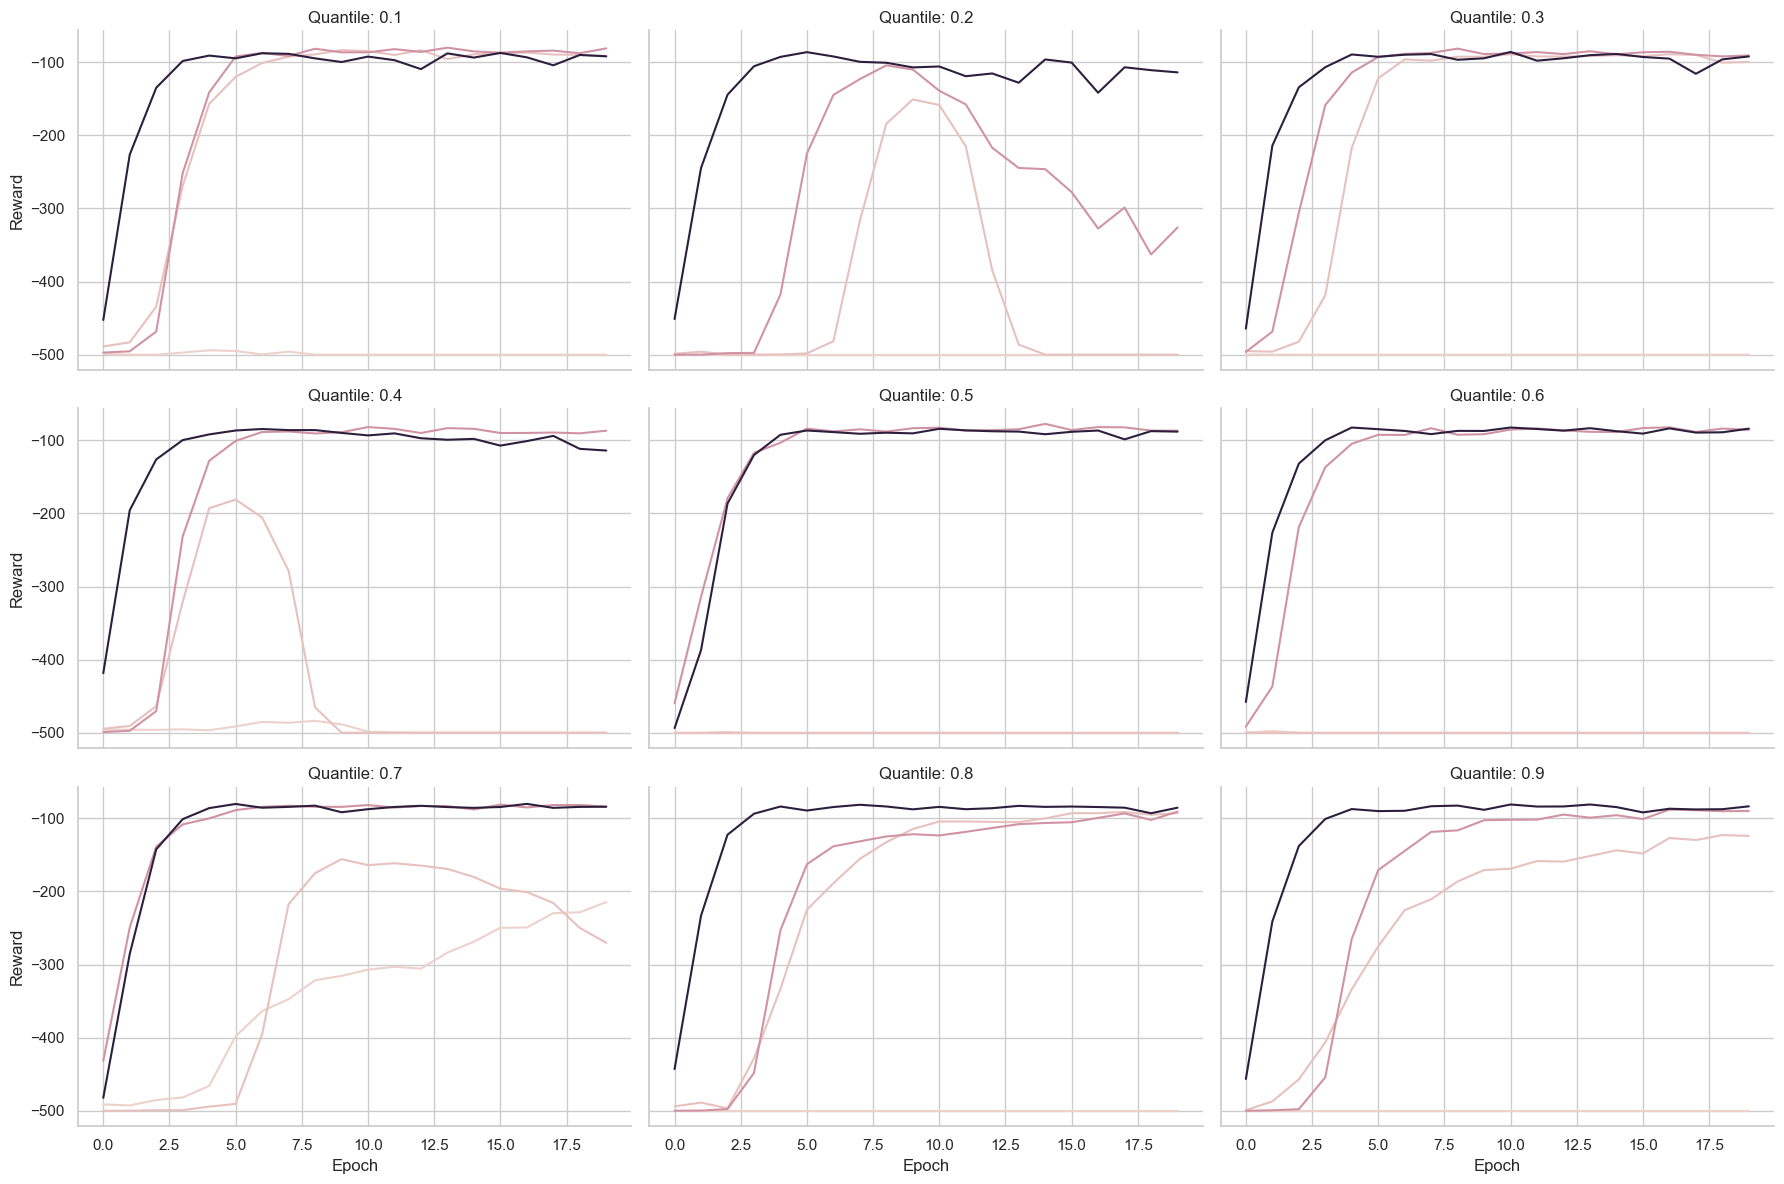

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.FacetGrid(df, col='quantile', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'epoch', 'reward', 'trajectories', markers=True)

g.set_axis_labels('Epoch', 'Reward')
g.set_titles(col_template="Quantile: {col_name}")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

На графиках рассматриваются 2 гиперпараметра: квантиль и количество траекторий. Чем темнее график, тем больше траекторий, значения которые ипользовались: 30, 100, 300, 1000. Разные квантили представлены на разных графиках (от 0.1 до 0.9 включительно с шагом 0.1). Гиперпараметры нейросети и обучение не рассматривались, потому что иначе пространство гиперпараметров будет слишком большим (количество слоёв, количество нейронов, разные активации, разные оптимизаторы, разные learning rates итд). Для нейросети использовалась сеть с 3 слоями по 64 нейрона, LeakyReLU, Adam, lr 1e-4, epsilon = 1/N.

Агенты со средней наградой больше -100 считаются решившими задачу, это можно видеть по записанным видео (не включённым в отчёт). Для малого числа траекторий почти никакой квантиль не спасает, чем больше траекторий, тем лучше. Видно, что для даже для низких квантилей, при большом числе траекторий задача решается, но решение нестабильно и засоряется плохими траекториями что ведёт к временному падению средней награды. Начиная с квантиля 0.5 решение для большого числа траекторий решение стабильно. С более высоким квантилем обучение происходит быстрее, так как меньше примеров нужно добавлять в нейросеть.

**Результат**:
* Количество траекторий: 1000 (достаточно, но чем больше, тем лучше)
* Квинтиль: 0.9 (любое значение больше 0.5 подойдёт)

# Задание 2

Реализовать алгоритм Кросс-Энтропии для непрерывного пространства действий. Обучить агента решать Pendulum-v1 или MountainCarContinuous-v0 на выбор. Исследовать гиперпараметры алгоритма и выбрать лучшие.

В данной работе рассматривается **Pendulum-v1**.

In [6]:
df2 = pd.read_csv("task2.csv")
df2.head()

,epoch,reward,quantile,trajectories
0,0,-1376.188357,0.1,30
1,1,-1290.739225,0.1,30
2,2,-1311.715029,0.1,30
3,3,-1243.576156,0.1,30
4,4,-1298.898214,0.1,30


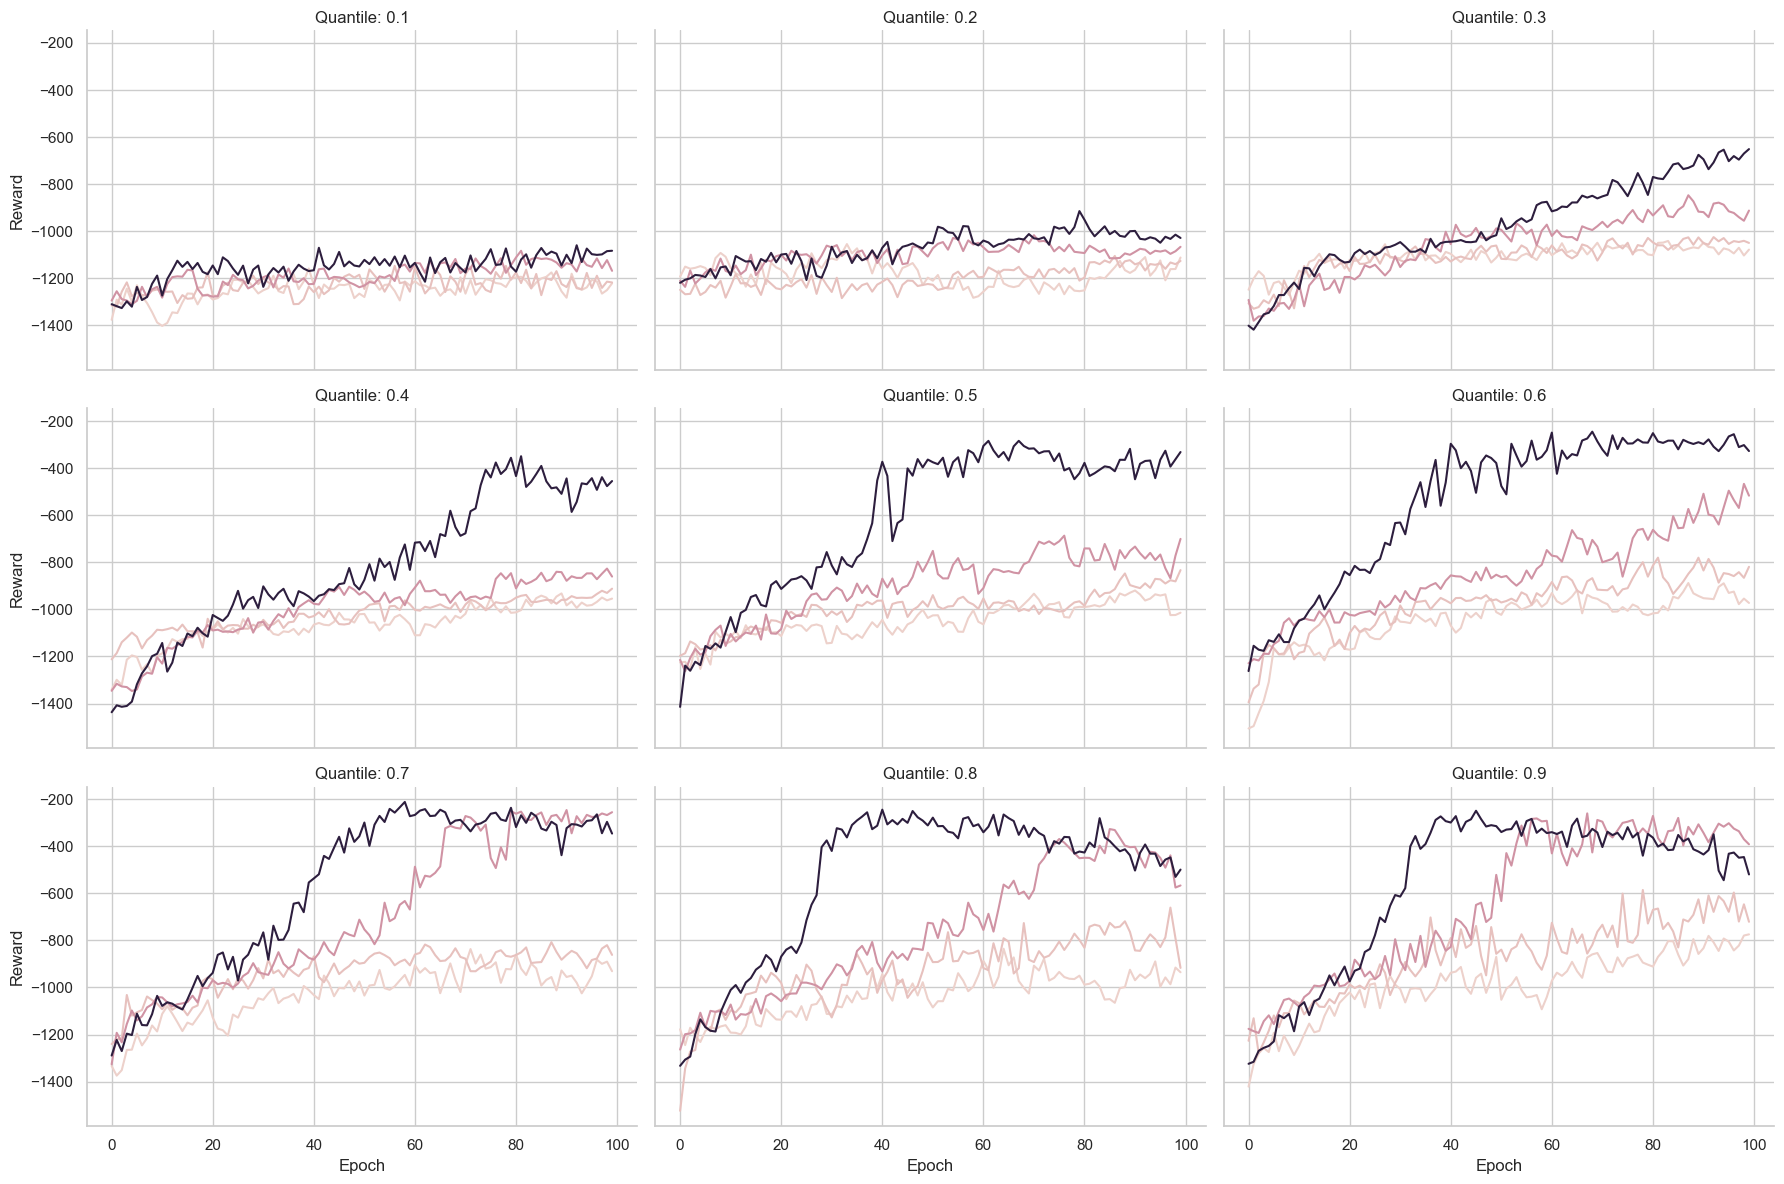

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.FacetGrid(df2, col='quantile', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'epoch', 'reward', 'trajectories', markers=True)

g.set_axis_labels('Epoch', 'Reward')
g.set_titles(col_template="Quantile: {col_name}")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

На графиках рассматриваются 2 гиперпараметра: квантиль и количество траекторий. Чем темнее график, тем больше траекторий, значения которые ипользовались: 30, 100, 300, 1000. Разные квантили представлены на разных графиках (от 0.1 до 0.9 включительно с шагом 0.1). Гиперпараметры нейросети примерно такие же, только epsilon уменьшается равномерно от 1 до 0.2 (как было показано на семинаре).

Среда считается решённой при награде выше -300. Для низких квантилей особого прогресса в решении задачи не было, нейросеть менее устойчива к мусорным данным и при низком квантиле слишком много шума мешают агенту выучить верную стратегию. Интересная ситуация с высокими квантилями и большим числом траекторий, там агент достигается оптимальной стратегии, но потом среднее значение падает. Анализ поведения агента показывает в силу особенности среды в ней всегда будут ситуации, когда маятник внизу и его надо раскачать. Видимо, эти данные мешают сети удерживать локальный минимум и сеть сбивается. Поэтому в данной задаче кажется важным количество примеров, которые попадают в обучение сети, либо более низкий квантиль, либо меньшее число траекторий.

**Результат**:
* Количество траекторий и квантиль: 1000 траекторий и квантиль 0.6, либо 300 траекторий и квантиль 0.7.